In [1]:
import cv2
from bag_reader.bag_reader import BagReader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
data = BagReader('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-11-08-10-07-30.bag')
data.get_data()

[INFO]  Data folder /home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-11-08-10-07-30 already exists. Not creating.
[INFO]  Bag already exported, Reading data ...


In [3]:
disp = np.load(data.disparity_df.np_path[0])
#np.nan_to_num(disp,0)
print(disp)

[[        nan         nan         nan ... -13.857152  -13.88517
  -13.933969 ]
 [        nan         nan         nan ... -13.89822   -13.946329
  -13.94561  ]
 [        nan         nan         nan ... -13.938691  -13.952165
  -13.950319 ]
 ...
 [        nan         nan         nan ...  -8.103006   -8.099405
   -8.1029215]
 [        nan         nan         nan ...  -7.7009172  -7.9835844
   -7.989574 ]
 [        nan         nan         nan ...         nan  -7.7903757
          nan]]


In [4]:
min_disp = data.disparity_df.min_disparity[50]
print(min_disp)
max_disp = data.disparity_df.max_disparity[50]
print(max_disp)



-75.6460189819336
-2.1125731468200684


[[        nan         nan         nan ... -13.857152  -13.88517
  -13.933969 ]
 [        nan         nan         nan ... -13.89822   -13.946329
  -13.94561  ]
 [        nan         nan         nan ... -13.938691  -13.952165
  -13.950319 ]
 ...
 [        nan         nan         nan ...  -8.103006   -8.099405
   -8.1029215]
 [        nan         nan         nan ...  -7.7009172  -7.9835844
   -7.989574 ]
 [        nan         nan         nan ...         nan  -7.7903757
          nan]]

[[      nan       nan       nan ... 61.788868 61.76085  61.71205 ]
 [      nan       nan       nan ... 61.7478   61.69969  61.70041 ]
 [      nan       nan       nan ... 61.70733  61.693855 61.6957  ]
 ...
 [      nan       nan       nan ... 67.543015 67.546616 67.5431  ]
 [      nan       nan       nan ... 67.9451   67.66244  67.65645 ]
 [      nan       nan       nan ...       nan 67.855644       nan]]
inf
[[      nan       nan       nan ... 214.27203 214.17487 214.00565]
 [      nan       nan       nan .

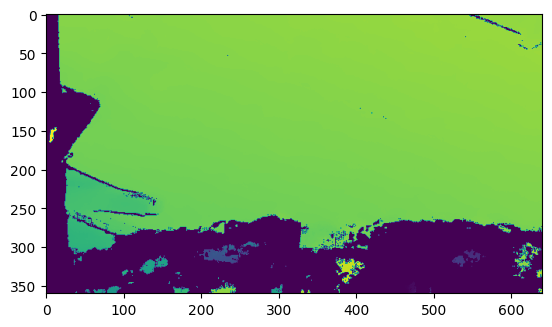

In [7]:
disp_cv = disp.copy()
print(disp_cv)
print("")
shiftedDisparity = (disp_cv - min_disp)
print(shiftedDisparity)
print(np.nanmax(shiftedDisparity))
scaledDisparity = (shiftedDisparity*255)/(max_disp - min_disp)
print(scaledDisparity)
scaledDisparity = np.clip(scaledDisparity,0,255)


scaledDisparity = scaledDisparity.astype(np.uint8)
print(scaledDisparity)
cv2.imwrite("asd.jpg",scaledDisparity)

plt.imshow(scaledDisparity)

[[[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [255 136   0]
  [255 136   0]
  [255 136   0]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [255 136   0]
  [255 136   0]
  [255 136   0]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [255 136   0]
  [255 136   0]
  [255 136   0]]

 ...

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [  0   8 255]
  [  0   8 255]
  [  0   8 255]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [  0   8 255]
  [  0   4 255]
  [  0   4 255]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [  0   8 255]
  [  0   8 255]
  [  0   4 255]]]


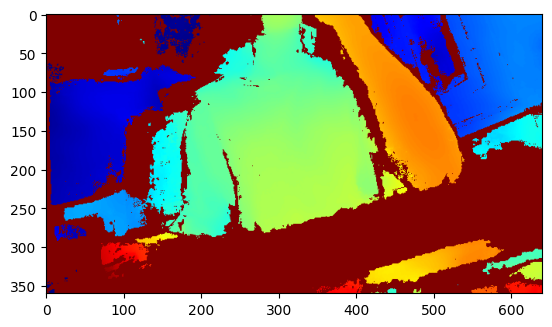

In [15]:
heat = cv2.applyColorMap(scaledDisparity,cv2.COLORMAP_JET)
plt.imshow(heat)
heat = cv2.cvtColor(heat, cv2.COLOR_BGR2RGB)
cv2.imwrite("asd.jpg",heat)
print(heat)

